### Me fijo que snapshot es representativo de los bines de edad

In [3]:
import numpy as np

data = np.loadtxt('../_data/time.dat')
snap = data[:,0]
T = data[:,3]

ages = np.array([0,4,7,10])
time = 13.68449532 - ages


mask_0,  = np.where((T > time[0]-0.5) & (T <= time[0]))
mask_4,  = np.where((T > time[1]-0.5) & (T < time[1]+0.5))
mask_7,  = np.where((T > time[2]-0.5) & (T < time[2]+0.5))
mask_10, = np.where((T > time[3]-0.5) & (T < time[3]+0.5))

print(time[0],time[1],time[2],time[3])

print(T[mask_0],snap[mask_0])
print(T[mask_4],snap[mask_4])
print(T[mask_7],snap[mask_7])
print(T[mask_10],snap[mask_10])

13.68449532 9.68449532 6.68449532 3.68449532
[13.68449532 13.49046345 13.36181792] [127. 126. 125.]
[10.07531841  9.91144662  9.74929595  9.58888109  9.43021578  9.27331277] [105. 104. 103. 102. 101. 100.]
[7.05142171 6.88304876 6.75889127 6.59616586 6.43664521 6.28030977] [86. 85. 84. 83. 82. 81.]
[4.13413574 4.00225006 3.84913115 3.70147896 3.53592207 3.3995865
 3.24681186] [67. 66. 65. 64. 63. 62. 61.]


#### Elijo los snapshots 127, 103,84 y 64 para los bines 0, 4, 7, 10Gyr respectivamente

### Guardo las posiciones y masa de las part de gas en los dif snapshots

In [22]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as time

shID = np.loadtxt('../_data/my_halos.dat')[:,0]

path = '/z/omarioni/gradients/_simulations/snap_'

snap_ID = np.asarray([127,103,84,64])

for i in range(15):
    for j in range(4):
    
        snap  = h5py.File(path + str('%03d'%snap_ID[j])+'/subhalo_'+str('%d'%shID[i])+'.h5py', 'r')

        print('subhalo_'+str('%d'%shID[i]))

        aexp = snap['/Time'][()]
        h    = snap['/h'][()]
        Om_L = snap['/Omega_Lambda'][()]
        Om_M = snap['/Omega_0'][()]
        Rvir = snap['/R200'][()]

        pstr = snap['/Str/Coordinates'][()]
        mstr = snap['/Str/Masses'][()]
        vstr = snap['/Str/Velocities'][()]
        sft  = snap['/Str/FormationTime'][()]
        
        pgas = snap['/Gas/Coordinates'][()]
        mgas = snap['/Gas/Masses'][()]

        amask, = np.where(sft>0) #aca puede haber particulas con age<0, esas no son estrellas son gas cells.
        ages = time.conv2(sft[amask], h, Om_L, Om_M) #transformo el tiempo de formacion de factor de escala a Gyr
        age  = np.max(ages) - ages #lo resto asi saco la edad de las particulas (inverso al tiempo de form)

        xstr = pstr[amask,0] * aexp/h
        ystr = pstr[amask,1] * aexp/h
        zstr = pstr[amask,2] * aexp/h
        rstr = np.sqrt(xstr**2+ystr**2+zstr**2)
        
        xgas = pgas[:,0] * aexp/h
        ygas = pgas[:,1] * aexp/h
        zgas = pgas[:,2] * aexp/h

        v_x = vstr[amask,0] * np.sqrt(aexp)
        v_y = vstr[amask,1] * np.sqrt(aexp)
        v_z = vstr[amask,2] * np.sqrt(aexp)

    #     ID = IDs[amask]

        mstr = mstr[amask] * 1e10/h
        m_gas = mgas * 1e10/h

        rgal = 0.15*Rvir*aexp/h

        limit, = np.where(rstr < rgal)
        rsort = np.argsort(rstr[limit])
        Mc = np.cumsum(mstr[limit][rsort])
        Mgal = Mc[-1]
        limit50, = np.where(Mc < Mgal/2)
        r50 = rstr[limit][rsort][limit50][-1]

        veloc, = np.where(rstr < r50/2.)

        vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
        vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
        vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

        vx = v_x - vxcm
        vy = v_y - vycm
        vz = v_z - vzcm

        e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,r50/2.)

        xn_gas = e1x*xgas + e1y*ygas + e1z*zgas
        yn_gas = e2x*xgas + e2y*ygas + e2z*zgas
        zn_gas = e3x*xgas + e3y*ygas + e3z*zgas

        pos_gas  = np.ndarray([np.size(xn_gas),4])
        pos_gas[:,0] = xn_gas
        pos_gas[:,1] = yn_gas
        pos_gas[:,2] = zn_gas
        pos_gas[:,3] = m_gas
    
        np.savetxt('../_data/pos_gas_age/gas_pos_'+str('%03d'%snap_ID[j])+'_sh_' + str('%d'%shID[i])+'.dat', 
                  pos_gas, fmt=('%12.8f','%12.8f','%12.8f','%12.8f'))


subhalo_127000000000002
subhalo_127000000000002
subhalo_127000000000002
subhalo_127000000000002
subhalo_127000000000003
subhalo_127000000000003
subhalo_127000000000003
subhalo_127000000000003
subhalo_127000000000004
subhalo_127000000000004
subhalo_127000000000004
subhalo_127000000000004
subhalo_127000000000006
subhalo_127000000000006
subhalo_127000000000006
subhalo_127000000000006
subhalo_127000000000007
subhalo_127000000000007
subhalo_127000000000007
subhalo_127000000000007
subhalo_127000000000009
subhalo_127000000000009
subhalo_127000000000009
subhalo_127000000000009
subhalo_127000000000012
subhalo_127000000000012
subhalo_127000000000012
subhalo_127000000000012
subhalo_127000000000011
subhalo_127000000000011
subhalo_127000000000011
subhalo_127000000000011
subhalo_127000000000014
subhalo_127000000000014
subhalo_127000000000014
subhalo_127000000000014
subhalo_127000000000020
subhalo_127000000000020
subhalo_127000000000020
subhalo_127000000000020
subhalo_127000000000021
subhalo_12700000

### Grafico las particulas de gas en los diferentes snapshots

subhalo_127000000000002


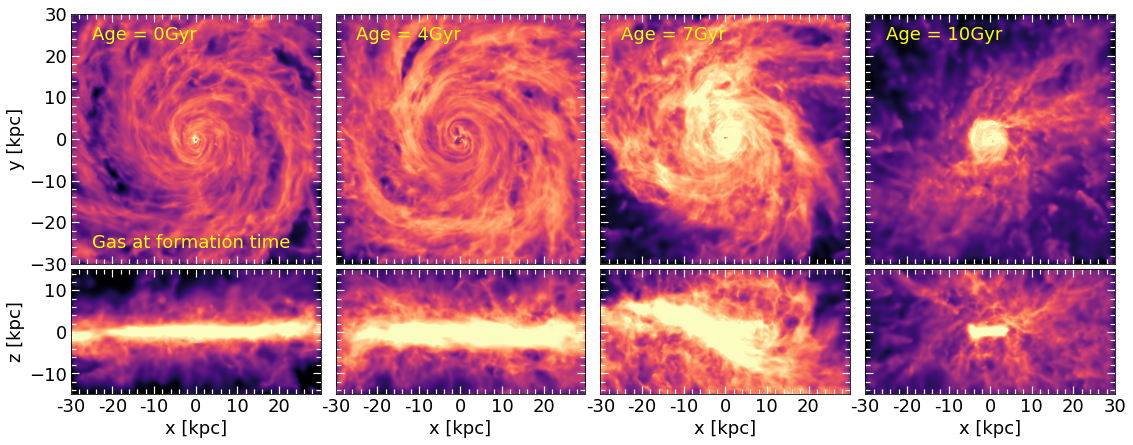

subhalo_127000000000003


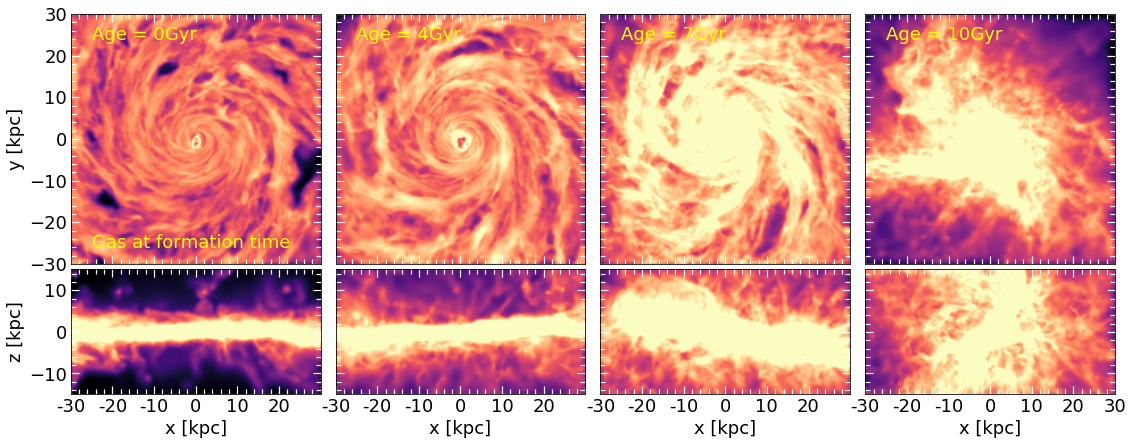

subhalo_127000000000004


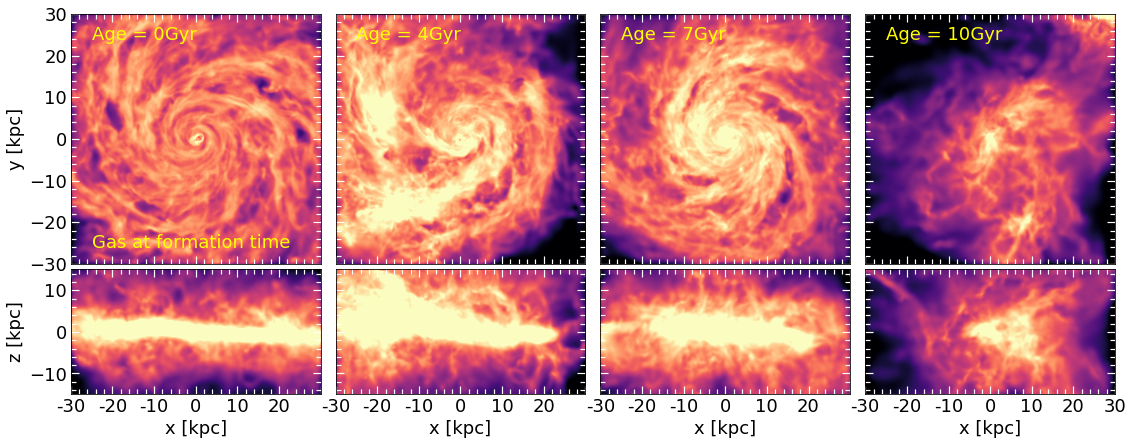

subhalo_127000000000006


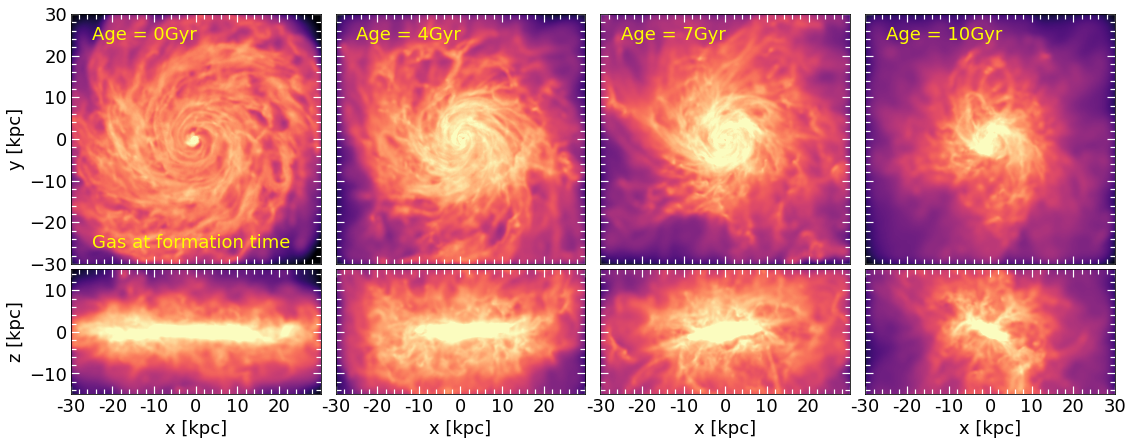

subhalo_127000000000007


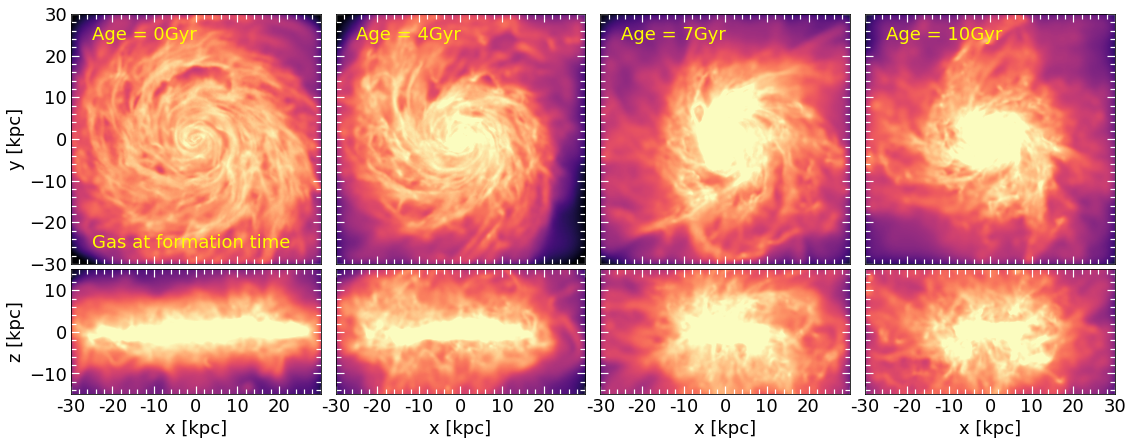

subhalo_127000000000009


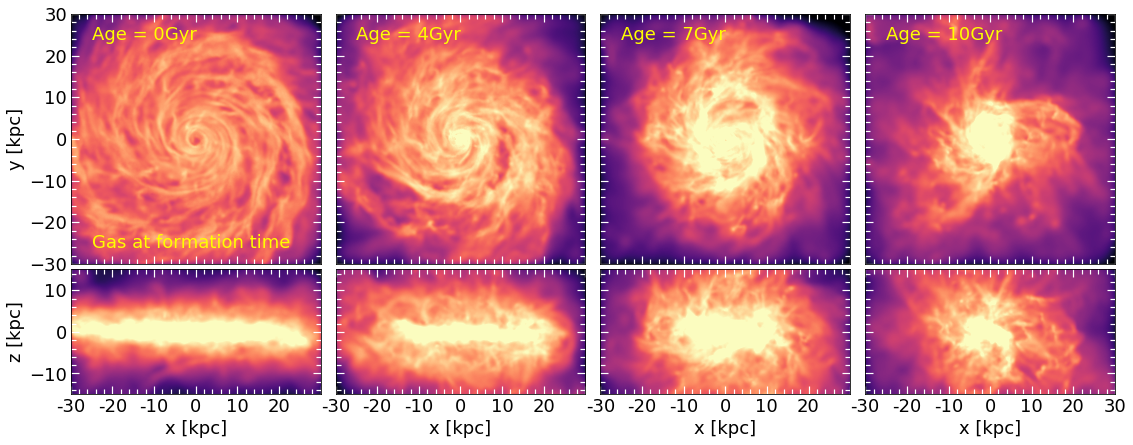

subhalo_127000000000012


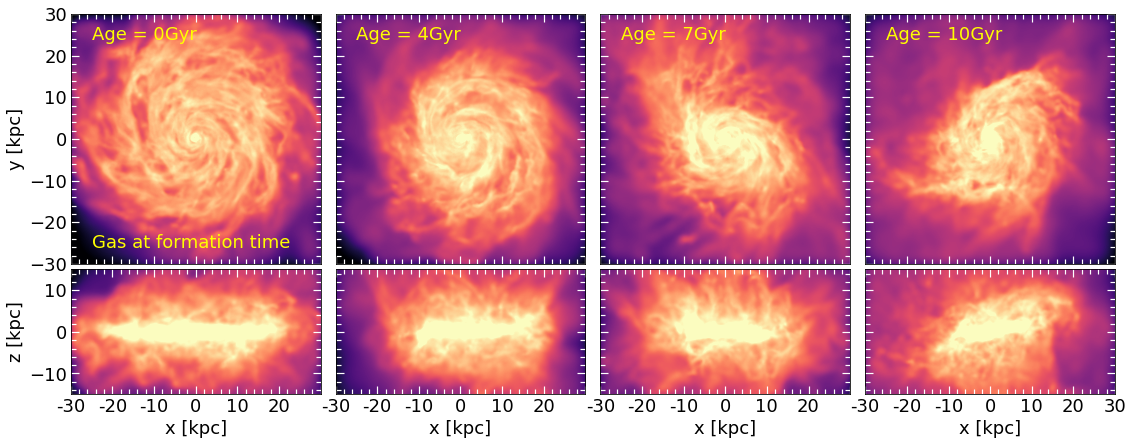

subhalo_127000000000011


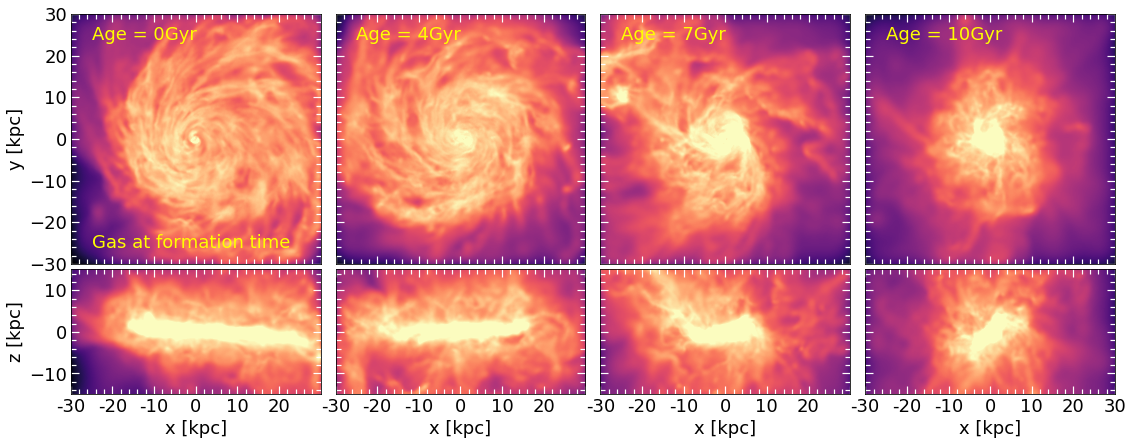

subhalo_127000000000014


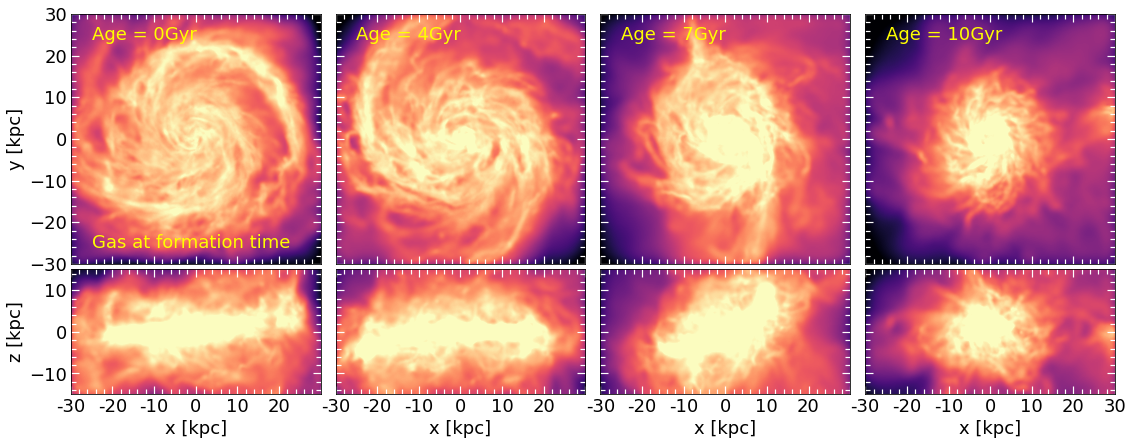

subhalo_127000000000020


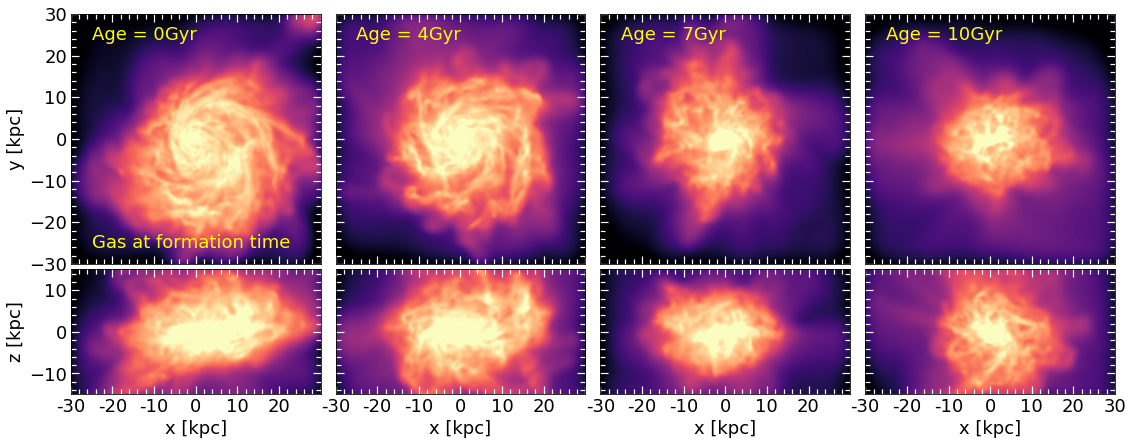

subhalo_127000000000021


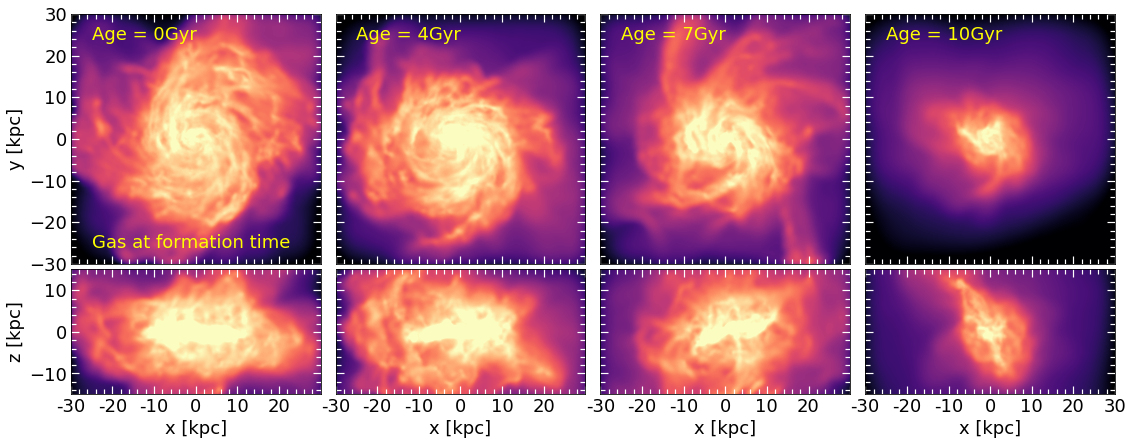

subhalo_127000000000023


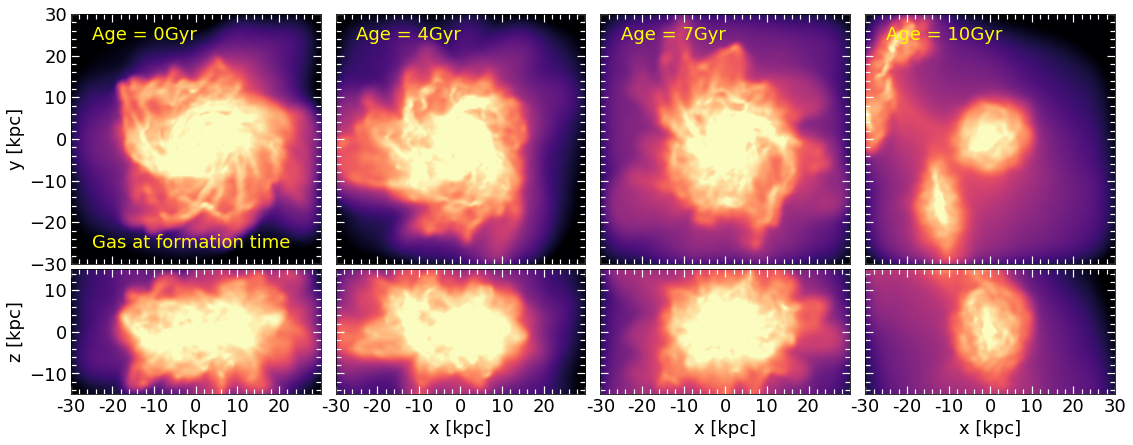

subhalo_127000000000028


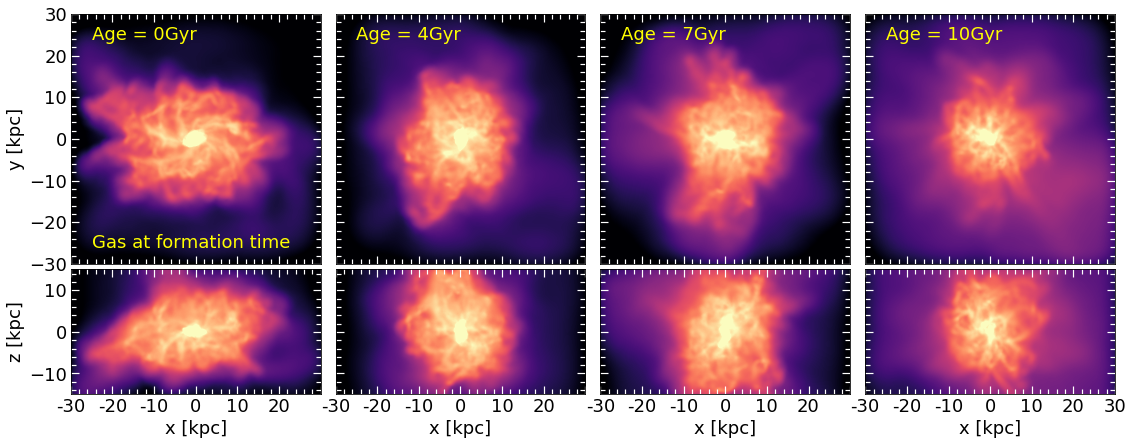

subhalo_127000000000031


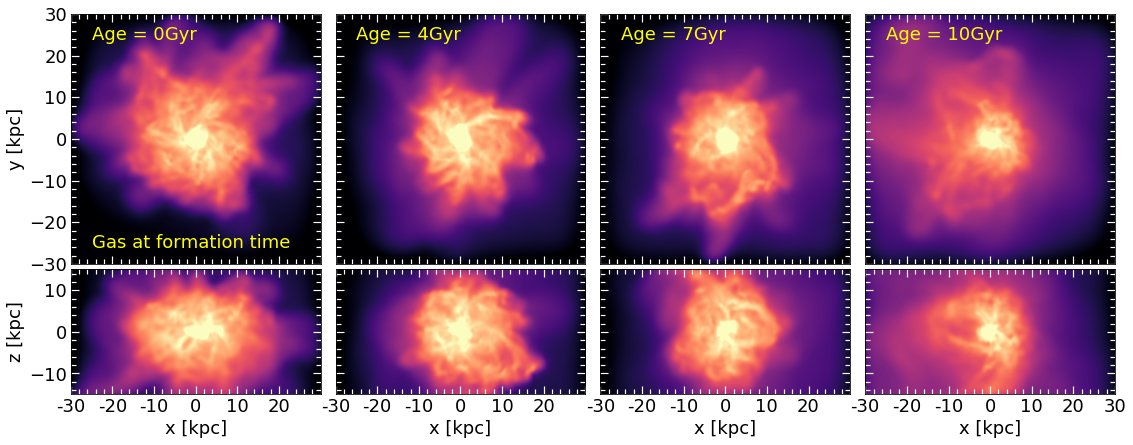

subhalo_127000000000030


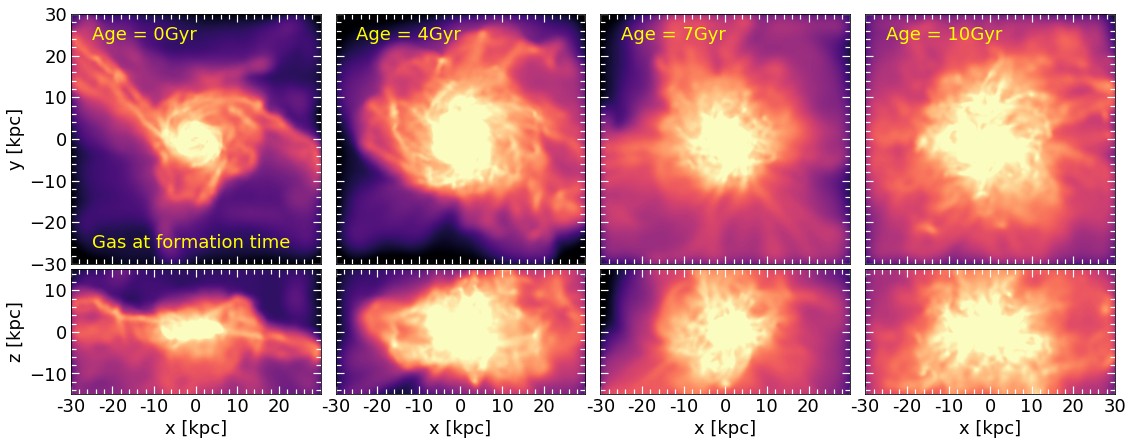

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import sphviewer as sph

shID = np.loadtxt('../_data/my_halos.dat')[:,0]

path = '/z/omarioni/gradients/_simulations/snap_'

gas_vmin = np.asarray([6.0,5.5,5.7,4.8,4.7,5.0,4.7,4.5,4.6,4.6,4.6,4.3,4.5,4.5,4.5])
gas_vmax = np.asarray([8.0,7.5,7.6,7.7,7.4,7.5,7.5,7.5,7.3,7.3,7.3,7.0,7.5,7.3,7.0])

for i in range(15):
    
        gas0 = np.loadtxt('../_data/pos_gas_age/gas_pos_127_sh_' + str('%d'%shID[i])+'.dat')
        x0_gas = gas0[:,0]
        y0_gas = gas0[:,1]
        z0_gas = gas0[:,2]
        m0_gas = gas0[:,3] 
        r0 = np.sqrt(x0_gas**2+y0_gas**2+z0_gas**2)
        
        gas4 = np.loadtxt('../_data/pos_gas_age/gas_pos_103_sh_' + str('%d'%shID[i])+'.dat')
        x4_gas = gas4[:,0]
        y4_gas = gas4[:,1]
        z4_gas = gas4[:,2]
        m4_gas = gas4[:,3]
        r4 = np.sqrt(x4_gas**2+y4_gas**2+z4_gas**2)
        
        gas7 = np.loadtxt('../_data/pos_gas_age/gas_pos_084_sh_' + str('%d'%shID[i])+'.dat')
        x7_gas = gas7[:,0]
        y7_gas = gas7[:,1]
        z7_gas = gas7[:,2]
        m7_gas = gas7[:,3]
        r7 = np.sqrt(x7_gas**2+y7_gas**2+z7_gas**2)
        
        gas10 = np.loadtxt('../_data/pos_gas_age/gas_pos_064_sh_' + str('%d'%shID[i])+'.dat')
        x10_gas = gas10[:,0]
        y10_gas = gas10[:,1]
        z10_gas = gas10[:,2]
        m10_gas = gas10[:,3]
        r10 = np.sqrt(x10_gas**2+y10_gas**2+z10_gas**2)
    
        print('subhalo_'+str('%d'%shID[i]))
        
        fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 6), 
                               gridspec_kw = {'height_ratios':[4,2], 'width_ratios':[4,4,4,4]})

        fig.subplots_adjust(bottom=0.1, left =0.05, right = 0.97, top = 0.98, wspace=-0.002, hspace= 0.03)

        #----------------------------------------------------------------------
        #---------------------generador del grafico1-----------------
        rl= 30   
        corte0, = np.where((x0_gas <rl) & (y0_gas <rl) & (z0_gas <rl) & (x0_gas >-rl) & (y0_gas >-rl) & (z0_gas >-rl))
        corte4, = np.where((x4_gas <rl) & (y4_gas <rl) & (z4_gas <rl) & (x4_gas >-rl) & (y4_gas >-rl) & (z4_gas >-rl))
        corte7, = np.where((x7_gas <rl) & (y7_gas <rl) & (z7_gas <rl) & (x7_gas >-rl) & (y7_gas >-rl) & (z7_gas >-rl))
        corte10, = np.where((x10_gas <rl) & (y10_gas <rl) & (z10_gas <rl) & (x10_gas >-rl) & (y10_gas >-rl) & (z10_gas >-rl))


        #-----rango que tiene la escala  de colores-----
        vmin = gas_vmin[i]
        vmax = gas_vmax[i]

        # ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
        cmap='magma'

        nb1 = 50
        #         nb1 = 100 
        #         npixel = 1000
        npixel = 1000

        particles=sph.Particles(gas0[corte0,:3],m0_gas[corte0],nb=nb1)
        escena=sph.Scene(particles)
        escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
        rend0=sph.Render(escena)
        extent=escena.get_extent()
        rend0.set_logscale()

        ax[0,0].imshow(rend0.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
        ax[0,0].set_xlim(-30,30)
        ax[0,0].set_ylim(-30,30)
        ax[0,0].set_xticks([-30,-20,-10,0,10,20,30])
    #     ax[0,0].set_yticks([])
    #     ax[0,0].set_yticklabels([])
        ax[0,0].set_xticklabels([])
        ax[0,0].text(-25, 25, 'Age = 0Gyr', fontsize=18, color='yellow', ha='left', va='center') 
        ax[0,0].text(-25, -25, 'Gas at formation time', fontsize=18, color='yellow', ha='left', va='center') 
    #     ax[0,0].set_title('XY', loc='center', fontsize=18)
        ax[0,0].set_ylabel('y [kpc]', fontsize=18)
        ax[0,0].minorticks_on()
        ax[0,0].tick_params( labelsize=18)
        ax[0,0].tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on',color='w')
        ax[0,0].tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on',color='w')


        particles=sph.Particles(gas4[corte4,:3],m4_gas[corte4],nb=nb1)
        escena=sph.Scene(particles)
        escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
        rend0=sph.Render(escena)
        extent=escena.get_extent()
        rend0.set_logscale()

        ax[0,1].imshow(rend0.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
        ax[0,1].set_xlim(-30,30)
        ax[0,1].set_ylim(-30,30)
        ax[0,1].set_xticks([-30,-20,-10,0,10,20,30])
    #     ax[0,1].set_yticks([])
        ax[0,1].set_yticklabels([])
        ax[0,1].set_xticklabels([])
        ax[0,1].text(-25, 25, 'Age = 4Gyr', fontsize=18, color='yellow', ha='left', va='center') 
    #     ax[0,1].set_title('XY', loc='center', fontsize=18)
    #     ax[0,1].set_ylabel('y [kpc]', fontsize=15)
        ax[0,1].minorticks_on()
        ax[0,1].tick_params( labelsize=18)
        ax[0,1].tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on',color='w')
        ax[0,1].tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on',color='w')


        particles=sph.Particles(gas7[corte7,:3],m7_gas[corte7],nb=nb1)
        escena=sph.Scene(particles)
        escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
        rend0=sph.Render(escena)
        extent=escena.get_extent()
        rend0.set_logscale()

        ax[0,2].imshow(rend0.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
        ax[0,2].set_xlim(-30,30)
        ax[0,2].set_ylim(-30,30)
        ax[0,2].set_xticks([-30,-20,-10,0,10,20,30])
    #     ax[0,2].set_yticks([])
        ax[0,2].set_yticklabels([])
        ax[0,2].set_xticklabels([])
        ax[0,2].text(-25, 25, 'Age = 7Gyr', fontsize=18, color='yellow', ha='left', va='center') 
    #     ax[0,2].set_title('XY', loc='center', fontsize=18)
    #     ax[0,2].set_ylabel('y [kpc]', fontsize=15)
        ax[0,2].minorticks_on()
        ax[0,2].tick_params( labelsize=18)
        ax[0,2].tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on',color='w')
        ax[0,2].tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on',color='w')


        particles=sph.Particles(gas10[corte10,:3],m10_gas[corte10],nb=nb1)
        escena=sph.Scene(particles)
        escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
        rend0=sph.Render(escena)
        extent=escena.get_extent()
        rend0.set_logscale()

        ax[0,3].imshow(rend0.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
        ax[0,3].set_xlim(-30,30)
        ax[0,3].set_ylim(-30,30)
        ax[0,3].set_xticks([-30,-20,-10,0,10,20,30])
    #     ax[0,3].set_yticks([])
        ax[0,3].set_yticklabels([])
        ax[0,3].set_xticklabels([])
        ax[0,3].text(-25, 25, 'Age = 10Gyr', fontsize=18, color='yellow', ha='left', va='center') 
    #     ax[0,3].set_title('XY', loc='center', fontsize=18)
    #     ax[0,3].set_ylabel('y [kpc]', fontsize=15)
        ax[0,3].minorticks_on()
        ax[0,3].tick_params( labelsize=18)
        ax[0,3].tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on',color='w')
        ax[0,3].tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on',color='w')

        #--------------------------------------
        particles=sph.Particles(gas0[corte0,:3],m0_gas[corte0],nb=nb1)
        escena=sph.Scene(particles)
        escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, xsize=npixel,ysize=npixel)
        rend=sph.Render(escena)
        extent=escena.get_extent()
        rend.set_logscale()

        # ax[0,0]=fig.add_subplot(221)
        ax[1,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
        ax[1,0].set_xlim(-30,30)
        ax[1,0].set_ylim(-15,15)
    #     ax[1,0].set_xticks([])
        ax[1,0].set_xticks([-30,-20,-10,0,10,20,30])
        ax[1,0].set_xticklabels([-30,-20,-10,0,10,20])
    #     ax[1,0].set_yticklabels([])
        ax[1,0].set_xlabel('x [kpc]',fontsize=18)
        ax[1,0].set_ylabel('z [kpc]',fontsize=18)
    #     ax[1,0].set_title('XZ', loc='center', fontsize=18)
        ax[1,0].minorticks_on()
        ax[1,0].tick_params( labelsize=18)
        ax[1,0].tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on',color='w')
        ax[1,0].tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on',color='w')


        particles=sph.Particles(gas4[corte4,:3],m4_gas[corte4],nb=nb1)
        escena=sph.Scene(particles)
        escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, xsize=npixel,ysize=npixel)
        rend=sph.Render(escena)
        extent=escena.get_extent()
        rend.set_logscale()

        ax[1,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
        ax[1,1].set_xlim(-30,30)
        ax[1,1].set_ylim(-15,15)
        #     ax[1,1].set_xticks([])
        ax[1,1].set_xticks([-30,-20,-10,0,10,20,30])
        ax[1,1].set_xticklabels([-30,-20,-10,0,10,20])
        ax[1,1].set_yticklabels([])
        ax[1,1].set_xlabel('x [kpc]',fontsize=18)
    #     ax[1,1].set_ylabel('z [kpc]',fontsize=15)
    #     ax[1,1].set_title('XZ', loc='center', fontsize=18)
        ax[1,1].minorticks_on()
        ax[1,1].tick_params( labelsize=18)
        ax[1,1].tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on',color='w')
        ax[1,1].tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on',color='w')


        particles=sph.Particles(gas7[corte7,:3],m7_gas[corte7],nb=nb1)
        escena=sph.Scene(particles)
        escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, xsize=npixel,ysize=npixel)
        rend=sph.Render(escena)
        extent=escena.get_extent()
        rend.set_logscale()

        ax[1,2].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
        ax[1,2].set_xlim(-30,30)
        ax[1,2].set_ylim(-15,15)
        #     ax[1,2].set_xticks([])
        ax[1,2].set_xticks([-30,-20,-10,0,10,20,30])
        ax[1,2].set_xticklabels([-30,-20,-10,0,10,20])
        ax[1,2].set_yticklabels([])
        ax[1,2].set_xlabel('x [kpc]',fontsize=18)
    #     ax[1,2].set_ylabel('z [kpc]',fontsize=15)
    #     ax[1,2].set_title('XZ', loc='center', fontsize=18)
        ax[1,2].minorticks_on()
        ax[1,2].tick_params( labelsize=18)
        ax[1,2].tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on',color='w')
        ax[1,2].tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on',color='w')


        particles=sph.Particles(gas10[corte10,:3],m10_gas[corte10],nb=nb1)
        escena=sph.Scene(particles)
        escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, xsize=npixel,ysize=npixel)
        rend=sph.Render(escena)
        extent=escena.get_extent()
        rend.set_logscale()

        ax[1,3].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
        ax[1,3].set_xlim(-30,30)
        ax[1,3].set_ylim(-15,15)
        #     ax[1,2].set_xticks([])
        ax[1,3].set_xticks([-30,-20,-10,0,10,20,30])
        ax[1,3].set_xticklabels([-30,-20,-10,0,10,20,30])
        ax[1,3].set_yticklabels([])
        ax[1,3].set_xlabel('x [kpc]',fontsize=18)
    #     ax[1,2].set_ylabel('z [kpc]',fontsize=15)
    #     ax[1,2].set_title('XZ', loc='center', fontsize=18)
        ax[1,3].minorticks_on()
        ax[1,3].tick_params( labelsize=18)
        ax[1,3].tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on',color='w')
        ax[1,3].tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on',color='w')

        path2 = '../_imagenes/ages_gas/'
        fig.savefig(path2 + 'gas_ages_sh_'+str('%d'%ID[i])+'.png', dpi = 100, xxbox_inches='tight')

        plt.show()